In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

# Membaca dataset

In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.shape

(205, 26)

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preparation

In [ ]:

df.drop(['CarName','car_ID', 'symboling'], axis=1, inplace=True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
cars_lr

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,gas,std,sedan,rwd,109.1,2952,ohc,four,141,3.78,114,188.8,68.9
201,19045.0,gas,turbo,sedan,rwd,109.1,3049,ohc,four,141,3.78,160,188.8,68.8
202,21485.0,gas,std,sedan,rwd,109.1,3012,ohcv,six,173,3.58,134,188.8,68.9
203,22470.0,diesel,turbo,sedan,rwd,109.1,3217,ohc,six,145,3.01,106,188.8,68.9


In [ ]:
onehot_df = cars_lr.copy()
onehot_df = pd.get_dummies(onehot_df)

In [ ]:
onehot_df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_diesel,fueltype_gas,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,0,1,...,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,0,1,...,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
onehot_df.shape

(205, 34)

# Visualisasi Data

Grafik Membandingkan antara horsepower dengan harga mobil

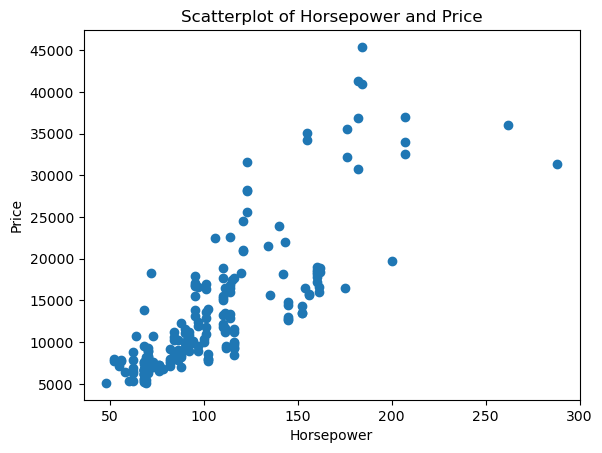

In [ ]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatterplot of Horsepower and Price')
plt.show()


Grafik Membandingkan antara perusahaan frekuensinya

[Text(0.5, 0, 'Perusahaan'), Text(0, 0.5, 'Frekuensi terhadap perusahaan')]

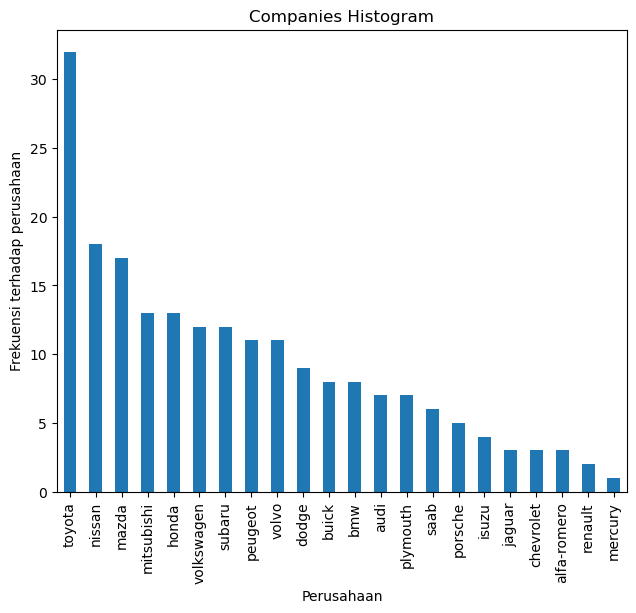

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind ='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Perusahaan', ylabel='Frekuensi terhadap perusahaan')

Grafik membandingkan antara harga dengan carlength,carwidth,carheight,curbweight

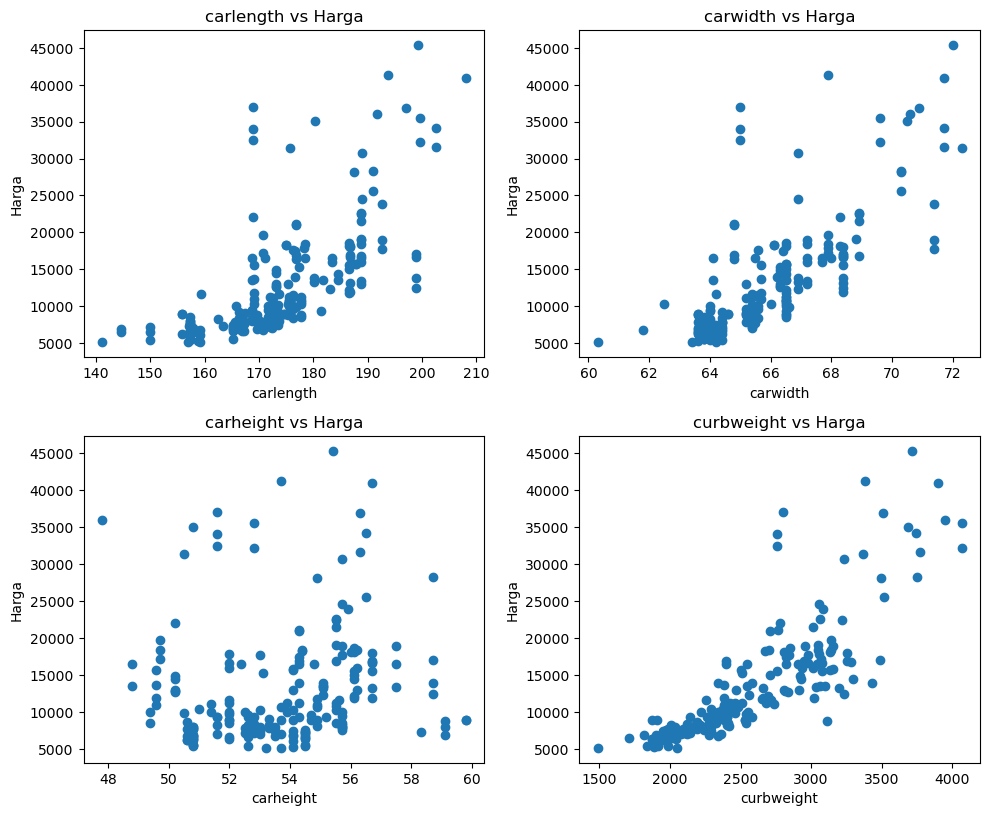

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Harga')
    plt.ylabel('Harga')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

# Test dan train dengan rasio 33% dan 77%.

Saya membnuat train test set dengan rasio 67% dan 33%

In [ ]:
X_train = onehot_df.drop('enginesize', axis=1)
y_train = onehot_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [ ]:
print('Jumlah data train:', X_train.shape[0])
print('Jumlah data test:', X_test.shape[0])

Jumlah data train: 137
Jumlah data test: 68


# Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# Hasil MSE serta visualisasikan

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

1.030326439459433e-23

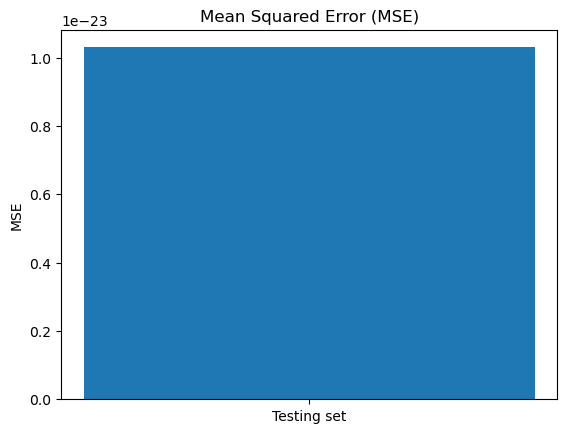

In [ ]:
plt.bar(['Testing set'], [mse])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.show()

# Mencari Best Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid ={
        'fit_intercept' : [True,False],
        'copy_X' : [True,False],
        'n_jobs' : [3,7,11],
    }
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [3, 7, 11]})

In [ ]:
print(grid_search.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 3}


# Gradient Descent

In [ ]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
def gradient_descent(X, y, lr=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    bias = 0
    cost_history = []

    for i in range(n_iterations):
        # Calculate the predicted values
        y_pred = np.dot(X, weights) + bias

        # Calculate the cost (MSE)
        cost = np.mean((y_pred - y)**2)
        cost_history.append(cost)

        # Calculate the gradients
        dw = 1/n_samples * np.dot(X.T, (y_pred - y))
        db = 1/n_samples * np.sum(y_pred - y)

        # Update the weights and bias
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, cost_history

In [ ]:
# Train the model using gradient descent
weights, bias, cost_history = gradient_descent(X_train_scaler, y_train)

# Predict the target variable for training set
y_train_pred = np.dot(X_train_scaler, weights) + bias

# Predict the target variable for testing set
y_test_pred = np.dot(X_test_scaler, weights) + bias

MSE (training set): 726201.5909584777
MSE (testing set): 1894143.0212347708


Text(0, 0.5, 'MSE')

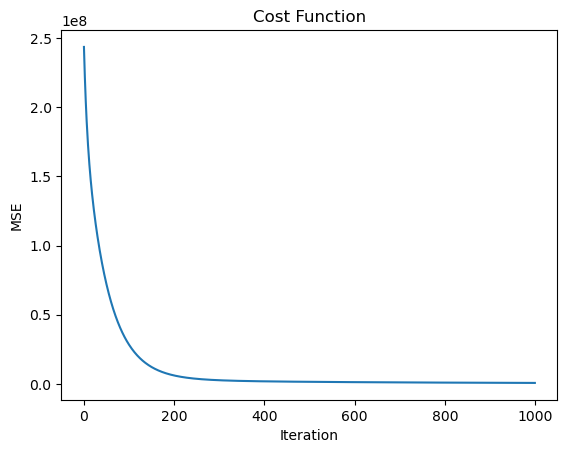

In [ ]:
# Calculate MSE for training set
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE (training set):', mse_train)

# Calculate MSE for testing set
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE (testing set):', mse_test)

# Visualize the cost history
plt.plot(cost_history)
plt.title('Cost Function')
plt.xlabel('Iteration')
plt.ylabel('MSE')